In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = os.getcwd() + '/ex2/ex2data1.txt'

In [3]:
data = pd.read_csv(path, header = None, names=['Exam 1 score', 'Exam 2 score', 'Admitted'])
data.describe()

,Exam 1 score,Exam 2 score,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


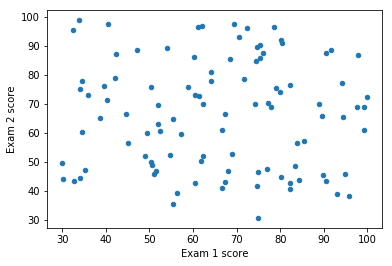

In [4]:
# visualise raw data

data.plot(kind='scatter', x='Exam 1 score', y='Exam 2 score')

In [5]:
data['Admitted'].isin([0])

0      True
1      True
2      True
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10     True
11     True
12    False
13    False
14     True
15    False
16    False
17     True
18    False
19    False
20     True
21    False
22     True
23     True
24    False
25    False
26    False
27     True
28     True
29     True
      ...  
70     True
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78     True
79     True
80    False
81    False
82    False
83    False
84    False
85    False
86     True
87    False
88    False
89     True
90    False
91    False
92     True
93    False
94    False
95    False
96    False
97    False
98    False
99    False
Name: Admitted, Length: 100, dtype: bool

In [6]:
# assign binary class

# dataframe['column name'] to access that column of data
# dataframe['Admitted'].isin([1]) # returns a series True/False if Admitted column in data(data frame) contains 1
# dataframe[] takes in the series of T/F and shows only True entries
class0 = data[data['Admitted'].isin([0])]
class1 = data[data['Admitted'].isin([1])]

Text(0,0.5,'Exam 2 score')

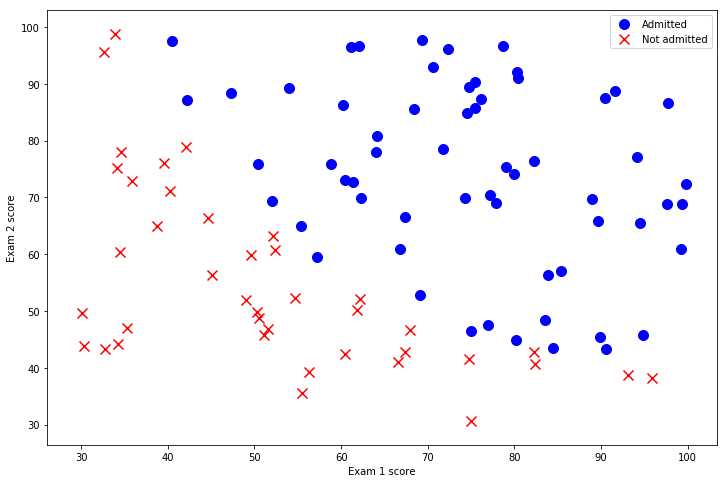

In [7]:
# visualise raw data graph

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=class1['Exam 1 score'], y=class1['Exam 2 score'], color='b', marker='o', label='Admitted', s=100)
ax.scatter(x=class0['Exam 1 score'], y=class0['Exam 2 score'], color='r', marker='x', label='Not admitted', s=100)
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

using traditional GDA

In [8]:
# define sigmoid function using lambda function

sigmoid = lambda z: 1 / (1 + np.exp(-z))

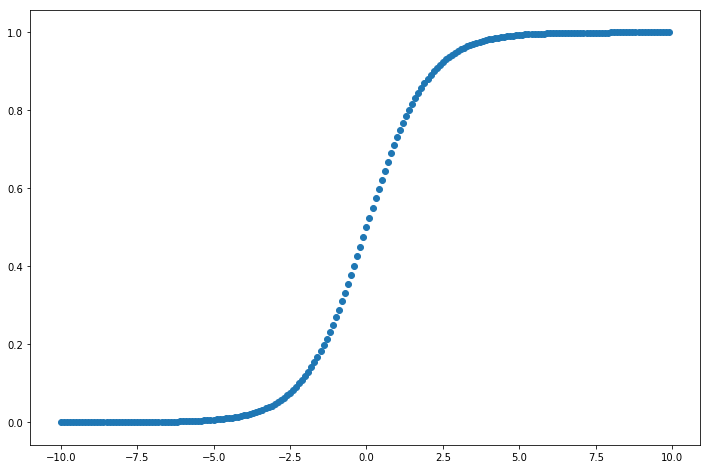

In [9]:
# test sigmoid function is working

test_range = np.arange(-10, 10, 0.1)

plt.figure(figsize=(12,8))
plt.scatter(x=test_range, y=sigmoid(test_range))

In [10]:
# create design matrix

data.insert(0, 'x0', 1) # insert feature 0
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
theta = np.mat(np.zeros((X.shape[1],1)))

X, y = np.mat(X.values), np.mat(y.values)
X.shape, theta.shape, y.shape

((100, 3), (3, 1), (100, 1))

In [11]:
# define cost function for logistics regression

def cost_function(theta, X, y):
    predicted_y = sigmoid(X * theta)
    return np.sum(1 / X.shape[0] * (-y.T * np.log(predicted_y) - (1 - y).T * np.log(1 - predicted_y)))

In [12]:
# confirm cost_function works

cost_function(theta, X, y)

0.6931471805599452

In [13]:
# implement normal gradient descent

def gradient_descent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    
    for i in range(iters):
        theta = theta - (alpha / X.shape[0] * X.T * (sigmoid(X * theta) - y))
        cost[i] = cost_function(theta, X, y)
    return theta, cost

In [14]:
# plot graph for iters vs cost

def plot_cost(cost, iters):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(np.arange(iters), cost, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Error vs Training Epoch')
    ax.set_xlim(0, iters)
    ax.set_ylim(cost[iters-1], cost[0])
    ax.grid(True)

[[-0.06946097]
 [ 0.01090733]
 [ 0.00099135]]
0.6249857589104834


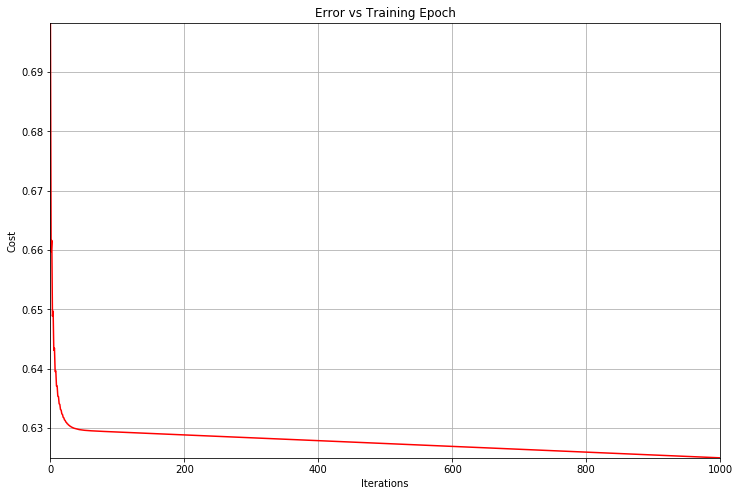

In [15]:
# runs normal GDA and plots graph

alpha = 0.001
iters = 1000
theta = np.mat(np.zeros((X.shape[1],1)))

theta_best, cost = gradient_descent(X, y, theta, alpha, iters)
print(theta_best)
print(np.amin(cost))
plot_cost(cost, iters)

using opt.fmin_tnc

In [16]:
# define cost function for logistics regression with opt.fmin_tnc

def cost_function(theta, X, y):
    # theta gets auto converted to array:
#     /usr/local/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py in __mul__(self, other)
#         307         if isinstance(other, (N.ndarray, list, tuple)) :
#         308             # This promotes 1-D vectors to row vectors    
# has to convert theta from n-D array to 1 x n matrix, then transpose to n x 1 matrix
    theta = np.mat(theta).T
    
    predicted_y = sigmoid(X * theta)
    return np.sum(1 / X.shape[0] * (-y.T * np.log(predicted_y) - (1 - y).T * np.log(1 - predicted_y)))

In [17]:
# implement gradient function, partial derivative of cost function
# using lambda function with vector
# has to convert theta from n-D array to 1 x n matrix, then reshape to n x 1 matrix

gradient = lambda theta, X, y: np.array((1 / X.shape[0] * X.T * (sigmoid(X * np.mat(theta).reshape((-1,1))) - y)).T).reshape((X.shape[1]))

In [18]:
# test gradient function is working

gradient(theta, X, y)
theta.shape, X.shape, y.shape

((3, 1), (100, 3), (100, 1))

In [19]:
# uses scipy's truncated newton implementation to find optimal parameters

import scipy.optimize as opt
result = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient, args=(X, y))
theta_best = result[0]
print(theta_best)
cost_function(theta_best, X, y)

[-25.16131859   0.20623159   0.20147149]


0.20349770158947475

In [20]:
def predict(theta, X):
    theta = np.mat(theta).T
    probability = sigmoid(X * theta)
    return [1 if x >= .5 else 0 for x in probability] # return as array of 0 or 1

In [21]:
predicted = predict(theta_best, X)

In [22]:
# add predicted column into dataframe, catches duplicate error
try:
    data.insert(4, 'predicted', predicted)
except ValueError:
    pass
data.head(10)

,x0,Exam 1 score,Exam 2 score,Admitted,predicted
0,1,34.623660,78.024693,0,0
1,1,30.286711,43.894998,0,0
2,1,35.847409,72.902198,0,0
3,1,60.182599,86.308552,1,1
4,1,79.032736,75.344376,1,1
5,1,45.083277,56.316372,0,0
6,1,61.106665,96.511426,1,1
7,1,75.024746,46.554014,1,0
8,1,76.098787,87.420570,1,1
9,1,84.432820,43.533393,1,1


In [23]:
predicted_class0 = data[data['predicted'].isin([0])]
predicted_class1 = data[data['predicted'].isin([1])]

Text(0,0.5,'Exam 2 score')

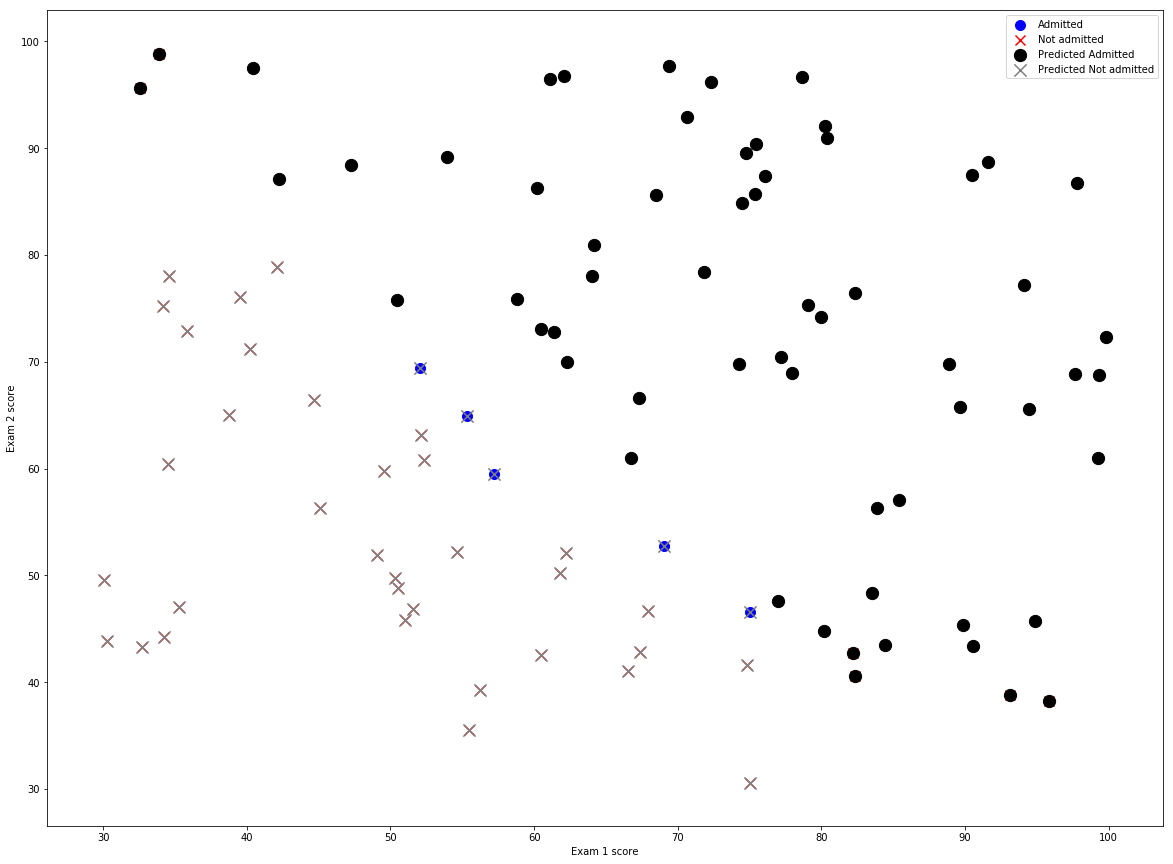

In [24]:
fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(x=class1['Exam 1 score'], y=class1['Exam 2 score'], color='b', marker='o', label='Admitted', s=100)
ax.scatter(x=class0['Exam 1 score'], y=class0['Exam 2 score'], color='r', marker='x', label='Not admitted', s=100)

ax.scatter(x=predicted_class1['Exam 1 score'], y=predicted_class1['Exam 2 score'], color='k', marker='o', label='Predicted Admitted', s=150)
ax.scatter(x=predicted_class0['Exam 1 score'], y=predicted_class0['Exam 2 score'], color='grey', marker='x', label='Predicted Not admitted', s=150)

ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

In [25]:
# test accuracy of predicted against y

# list comprehension
# need to convert y (matrix) to array, then ravel, then list, as predicted is list
correct = [1 if a == b else 0 for (a, b) in zip(list(np.array(y).ravel()), predicted)]
accurary = np.sum(correct) / len(correct)
print(accurary)

0.89


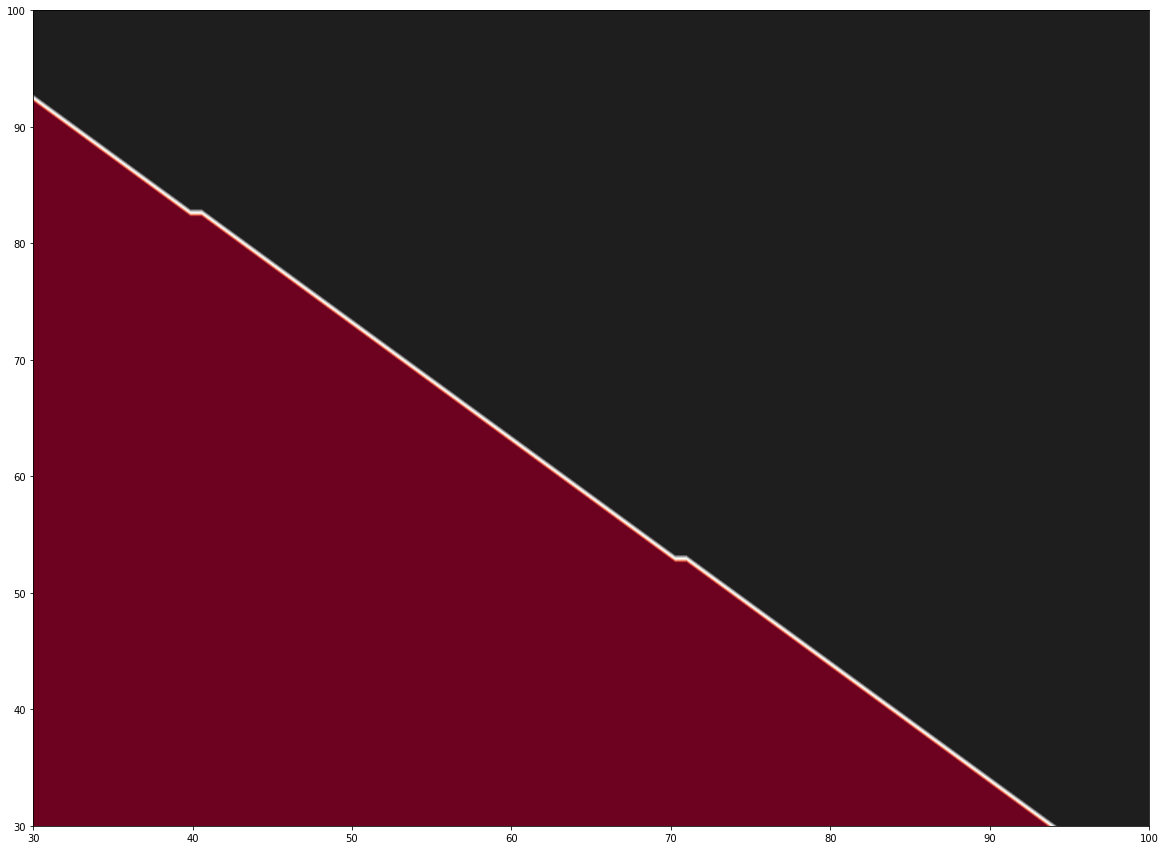

In [56]:
# plot decision boundary
# manually generate grid and calculate score for every grid

step = 100
exam_grid = np.hstack((
    np.linspace(30, 100, step).reshape((-1,1)),
    np.linspace(30, 100, step).reshape((-1,1))
))

predicted_grid = np.zeros((step, step))

# calculates each y by looping through every combination of grid
for i in range(step):
    for j in range(step):
        predicted_grid[i][j] = sum(predict(theta_best, np.array((1.0, exam_grid[i][0], exam_grid[j][1])))) # use sum() to convert array to int

plt.figure(figsize=((20,15)))
plt.contourf(exam_grid[:,0], exam_grid[:,1], predicted_grid, 50, cmap = 'RdGy')

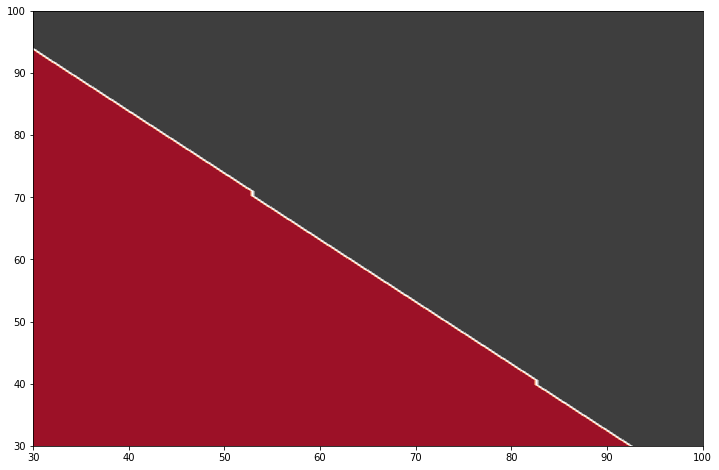

In [83]:
# plot decision boundary using mesh

x_min, x_max = 30, 100
y_min, y_max = 30, 100
step = 100

# create a grid mesh
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, step),
    np.linspace(y_min, y_max, step)
)

# ravel the grid to a list, then stack together
exam_grid = np.hstack((np.ones(xx.ravel().shape[0]).reshape(-1,1), xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)))

predicted_grid = predict(theta_best, exam_grid) # get a list of 0 and 1
predicted_grid = np.array(predicted_grid).reshape(xx.shape) # convert to np array, then reshape to x by x grid, for contour plot later
# print(predicted_grid)

plt.figure(figsize=((12,8)))
plt.contourf(xx, yy, predicted_grid, cmap = 'RdGy')